In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from IPython.display import HTML

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable, functional
import torch.optim as optim
from torch.utils.data import Dataset, dataloader
from torchsummary import summary

import sys
sys.path.append('../src')
from model import *
from datagen import *

In [3]:
hts = torch.tensor([0.0,-1.0])
x0 = torch.tensor([1.0,0.0])

torch.remainder(torch.acos(hts[0]/torch.linalg.norm(hts[:],dim=-1)),2*np.pi).T
torch.acos(hts[0]/torch.linalg.norm(hts[:],dim=-1))

C:\Users\matti\AppData\Local\Temp\ipykernel_4012\1993663843.py:4: UserWarning: Tensor.T is deprecated on 0-D tensors. This function is the identity in these cases. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3586.)
  torch.remainder(torch.acos(hts[0]/torch.linalg.norm(hts[:],dim=-1)),2*np.pi).T


tensor(1.5708)

In [4]:
hts = np.array([0.0,1.0])
x0 = np.array([1.0,0.0])

np.arccos(np.clip(np.dot(hts/np.linalg.norm(hts), x0), -1.0, 1.0))

1.5707963267948966

In [5]:
x = torch.tensor([[-1.0,-0.01,0.0],[0.0,1.0,0.0],[0.0,0.0,1.0]])
torch.acos(x[:,0]/torch.norm(x[:,:],dim=-1))

tensor([3.1316, 1.5708, 1.5708])

In [6]:
angles = torch.tensor([3.2,3.0,0.0])
np.pi - torch.abs(angles - np.pi)

tensor([3.0832, 3.0000, 0.0000])

In [7]:
hts = torch.tensor([[[0.0,-1.0],[0.0,1.0]],[[0.0,-1.0],[0.0,1.0]]])
#

torch.acos(torch.clamp(hts[1:,:,0]/torch.clamp(torch.norm(hts[1:,:,:],dim=-1),min=0.00001),-1.0,1.0)).T

tensor([[1.5708],
        [1.5708]])

In [8]:
torch.acos(torch.clamp(torch.tensor([-2,2]),-1.0,1.0))

tensor([3.1416, 0.0000])

In [9]:
for i in range(1,1):
    print(i)

In [10]:
import numpy as np

i = np.arange(1,self.time_steps)
j = np.arange(1,min(self.time_steps//2-int(self.time_steps*0.1),i)+1)
angle_test = torch.abs(torch.acos(torch.clamp(torch.sum(y[i]*y[i-j],dim=-1)/(torch.norm(y[i],dim=-1)*torch.norm(y[i-j],dim=-1)),-1.0,1.0)))
angle_theoretical = y_hat[i]-y_hat[i-j]
angle_loss += np.mean((angle_test-angle_theoretical)**2)

NameError: name 'self' is not defined

In [ ]:
y = torch.ones((64,20))
y = torch.concat((torch.zeros((64,1)),y),dim=1)
y.shape

torch.Size([64, 21])

In [ ]:
a = torch.tensor([[1,2,3],[1,2,3]])
b = torch.tensor([[4,5,6],[4,5,6]])
torch.sum(a*b,dim=-1)

tensor([32, 32])

In [ ]:
for i in range(1,time_steps):
    # Iterate through 1 to i followed up to time_steps//2 minus 10% of time_steps as explained in obsidian notes
    for j in range(1,min(time_steps//2-int(time_steps*0.1),i)+1):
        # print(y.shape,y_hat.shape)
        # Check angles between hts at time i and i-j
        # angle_test = torch.abs(torch.acos(torch.clamp(torch.sum(y[i]*y[i-j],dim=-1)/(torch.norm(y[i],dim=-1)*torch.norm(y[i-j],dim=-1)),-1.0,1.0)))
        normalizer = 1/(torch.norm(y[i],dim=-1)*torch.norm(y[i-j],dim=-1))
        # Check if y has any NaNs
        if y.isnan().any():
            print("y has NaNs")
        # Check if normalizer has any 0s
        if normalizer.isnan().any():
            print("normalizer has NaNs")
        angle_test = torch.abs(torch.acos(torch.clamp(torch.sum(y[i]*y[i-j],dim=-1)*normalizer,-0.9999,0.9999)))
        # Check if angle_test has any NaNs
        if angle_test.isnan().any():
            print("angle_test has NaNs")
        angle_theoretical = (y_hat[i]-y_hat[i-j])
        angle_loss += torch.mean((angle_test-angle_theoretical)**2)


In [18]:
time_steps = 21

i = torch.arange(1, time_steps).unsqueeze(1)
j = torch.arange(1, time_steps//2-int(time_steps*0.1)).unsqueeze(0)
mask = (i <= j).float()

mask

tensor([[1., 1., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
i = torch.arange(1, time_steps).unsqueeze(1)
j = torch.arange(1, time_steps//2-int(time_steps*0.1)).unsqueeze(0)
mask = (i >= j).float()
j = j * mask
# Convert i and j to int
i = i.long()
j = j.long()
normalizer = 1 / (torch.norm(y[i], dim=-1) * torch.norm(y[i-j], dim=-1))
angle_test = torch.abs(torch.acos(torch.clamp(torch.sum(y[i]*y[i-j], dim=-1) * normalizer, -0.9999, 0.9999)))
angle_theoretical = (y_hat[i]-y_hat[i-j])
angle_loss = torch.mean((angle_test-angle_theoretical)**2)

In [ ]:
for i in range(1,time_steps):
    for j in range(1,min(time_steps//2-int(time_steps*0.1),i)+1):
        normalizer = 1/(torch.norm(y[i],dim=-1)*torch.norm(y[i-j],dim=-1))
        angle_test = torch.abs(torch.acos(torch.clamp(torch.sum(y[i]*y[i-j],dim=-1)*normalizer,-0.9999,0.9999)))
        angle_theoretical = (y_hat[i]-y_hat[i-j])
        angle_loss += torch.mean((angle_test-angle_theoretical)**2)

In [32]:
batch_size = 64

data,labels = datagen_circular(batch_size,time_steps)
y_hat = labels.permute(1,0)
y_hat[:,0]

tensor([0.1378, 0.6254, 1.1068, 1.2634, 1.6171, 1.8477, 1.9772, 2.4022, 2.6533,
        2.8005, 3.1563, 3.3826, 3.8898, 4.2089, 4.2965, 4.5328, 4.7590, 5.0222,
        5.5811, 5.7769, 6.2832])

In [47]:
i = torch.arange(1, time_steps).unsqueeze(1)
j = torch.arange(1, time_steps//2-int(time_steps*0.1)).unsqueeze(0)
mask = (i >= j).float()
j = j * mask
# Convert i and j to int
i = i.long()
j = j.long()
# print(i)
# print(i-j)
angle_theoretical = (y_hat[i]-y_hat[i-j])
print(angle_theoretical[:,:,0])
print(y_hat[:,0])

tensor([[0.4876, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4814, 0.9691, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1566, 0.6380, 1.1256, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3537, 0.5103, 0.9918, 1.4794, 0.0000, 0.0000, 0.0000],
        [0.2305, 0.5843, 0.7409, 1.2223, 1.7099, 0.0000, 0.0000],
        [0.1295, 0.3601, 0.7138, 0.8704, 1.3518, 1.8394, 0.0000],
        [0.4250, 0.5545, 0.7850, 1.1388, 1.2954, 1.7768, 2.2644],
        [0.2512, 0.6762, 0.8057, 1.0362, 1.3899, 1.5465, 2.0280],
        [0.1472, 0.3983, 0.8233, 0.9529, 1.1834, 1.5371, 1.6937],
        [0.3558, 0.5029, 0.7541, 1.1791, 1.3086, 1.5391, 1.8929],
        [0.2263, 0.5820, 0.7292, 0.9804, 1.4054, 1.5349, 1.7654],
        [0.5073, 0.7335, 1.0893, 1.2365, 1.4876, 1.9126, 2.0422],
        [0.3191, 0.8264, 1.0526, 1.4084, 1.5556, 1.8067, 2.2317],
        [0.0876, 0.4067, 0.9139, 1.1402, 1.4960, 1.6432, 1.8943],
        [0.2363, 0.3239, 0.6430, 1.1502, 1.3765, 1.7323, 1.8795],
        [0

In [ ]:
((torch.abs(torch.sin(torch.tensor(2*np.pi))-torch.sin(torch.tensor(0))) + torch.abs(torch.cos(torch.tensor(2*np.pi))-torch.cos(torch.tensor(0))))**2).mean()

(-1.0998615404412626,
 1.0998615404412626,
 -1.0998665198505813,
 1.099856450275917)

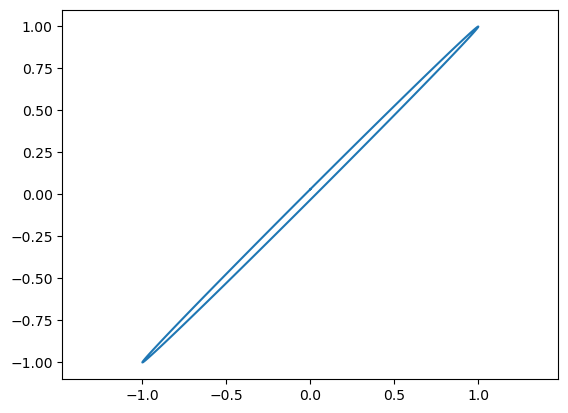

In [58]:
xs = np.linspace(0,2*np.pi,100)
plt.plot(np.sin(xs),np.sin(xs+np.pi/100))
plt.axis('equal')

In [60]:
2%4

2